In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score 
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report , mean_squared_error, roc_curve, auc
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("data_one_month_cleaned_over_sampling.csv")
df.head()

C:\Users\Tharshika NAGARATNAM\Anaconda3\Nouveau dossier (2)\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,auction_id,click,exchange,app_or_site,has_gps,device_type,connection_type,creative_size,has_ifa,win_price,...,fullOsInfo,Timestamp_second,Timestamp_minute,Timestamp_hour,Timestamp_DayOfWeek,Timestamp_DayOfMonth,Timestamp_Month,Days_Since_Campaign_Starts,Days_Before_Campaign_Ends,Campaign_Duration
0,00013c2d-c680-4108-ac8d-8606d72b6fd0,0,mopub,app,True,1,2,300x250,True,0.430000,...,Android9,53,57,15,7,2,11,34,8,42
1,0009ade41e7048ab19ba9ea839b246cb7f8fbaec_43,0,rubicon,site,False,4,unknown,320x50,False,0.149999,...,iOS13,16,9,1,6,8,11,2,53,55
2,0010e5a6-418c-4250-a257-9027f1ecfdd9,1,mopub,app,True,1,2,300x250,True,1.750000,...,Android7,30,11,5,5,14,11,3,2,5
3,00184670-d598-4e99-b067-13ae9aac471e,0,mopub,app,True,4,2,320x50,True,0.480000,...,iOS13,18,22,21,4,27,11,1,9,10
4,001f282c-efeb-4735-9a45-853c0c161039,0,mopub,app,True,4,1,320x480,False,1.180000,...,Android7,42,55,10,4,6,11,1,2,3


In [ ]:
#df.drop(df[df.click == 0].sample(70000).index, inplace=True)

In [3]:
import random
random.seed(1234)

In [5]:
df.shape

(92056, 78)

In [6]:
df['click'].value_counts()

0    85306
1     6750
Name: click, dtype: int64

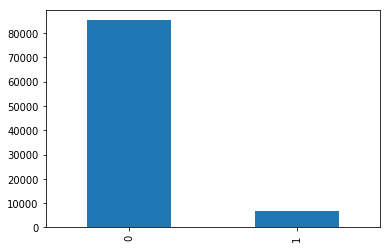

In [7]:
df['click'].value_counts().plot(kind='bar')

In [8]:
target = df.click
data = df.drop("click", axis = 1)

In [9]:
data.drop(['auction_id','win_price','IAB1', 'IAB1%', 'IAB10', 'IAB11',
       'IAB12', 'IAB13', 'IAB14', 'IAB15', 'IAB16', 'IAB17', 'IAB18', 'IAB19',
       'IAB2', 'IAB20', 'IAB21', 'IAB22', 'IAB23', 'IAB24', 'IAB3', 'IAB3%',
       'IAB4', 'IAB5', 'IAB6', 'IAB7', 'IAB8', 'IAB9', 'IAB9%', 'books',
       'busin', 'educa', 'enter', 'finan', 'games', 'healt', 'lifes', 'medic',
       'music', 'navig', 'news', 'photo', 'produ', 'refer', 'socia', 'sport',
       'trave', 'unkno', 'utili', 'weath', 'fullOsInfo', 'Country_language',
        'Country_language', 'Timestamp', 'Timestamp_second',
       'Timestamp_minute', 'IAB26', 'exchange'], axis = 1, inplace = True)

In [10]:
col = data.columns
for i in col:
    if data[i].dtype == 'O' :
        data = data.join(pd.get_dummies(data[i], prefix = i))
        data.drop([i], axis = 1, inplace = True)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size = 0.3 , random_state = 1234)

In [12]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 0)
X_train_res, y_train_res = smt.fit_sample(X_train.to_numpy(), y_train)

Using TensorFlow backend.


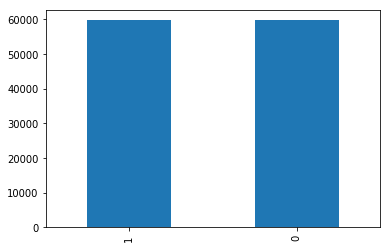

In [13]:
y_train_res.value_counts().plot(kind='bar')

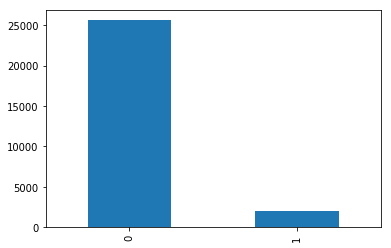

In [14]:
y_test.value_counts().plot(kind='bar')

In [ ]:
# parametres = dict(C =  [0.1,1,10], kernel = ['rbf', 'linear','poly'], gamma = [0.001,0.01, 0.1, 0.5])
# clf = SVC()
# grid_clf = GridSearchCV(estimator = clf, param_grid = parametres)
# grille = grid_clf.fit(X_train_res,y_train_res)
# print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,["params","mean_test_score"]])

# print(grid_clf.best_params_)

**ALGORITHME :**

On part d’un dataset réduit :

- 30 % positifs : faire un oversampling spécifique à prendre les cas positifs, analyser la variabilité de paramètre qu’on a entre ces différentes lignes et on en créée de nouveaux (en bougeant juste un peu les variables)

- 70 % négatifs avec un échantillon aléatoire

On a une métrique qui nous intéresse (F1-score)

On fait un modèle sur un échantillon d’apprentissage.

On teste le modèle sur un échantillon de test.

On calcule F1-score

Analyser les erreurs (faux négatifs et faux positifs) et de les corriger

* Tant que F1-score est inférieur à 40 % (ou un autre), on prend les input sur lesquels il s’est planté dans l’échantillon de test et les rajouter dans l’échantillon d’apprentissage.

* Réapprendre le modèle. Réappliquer sur l’échantillon de test. Réestimer F1-score.

* On recommence ça jusqu’à obtenir un F1-score qu’on souhaite obtenir.

**IDEE : Corriger petit à petit les erreurs qu’il fait jusqu’à obtenir un F1-score qu’on veut**

f1-score :  0.2948950505312258 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     25004
           1       0.25      0.36      0.29      1577

    accuracy                           0.90     26581
   macro avg       0.60      0.65      0.62     26581
weighted avg       0.92      0.90      0.91     26581
 

Matrice de confusion : 
 Prédite  False  True 
Réelle               
0        23291   1713
1         1008    569


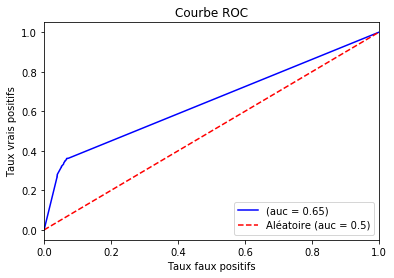

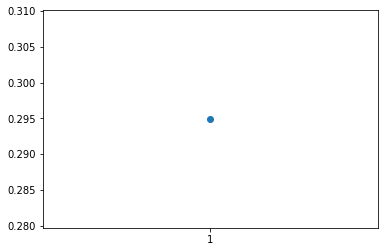

Vous voulez continuer : oui
f1-score :  0.3220046082949308 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     24661
           1       0.28      0.38      0.32      1476

    accuracy                           0.91     26137
   macro avg       0.62      0.66      0.64     26137
weighted avg       0.92      0.91      0.92     26137
 

Matrice de confusion : 
 Prédite  False  True 
Réelle               
0        23224   1437
1          917    559


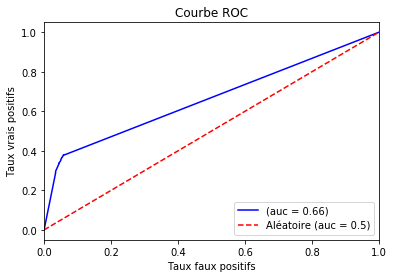

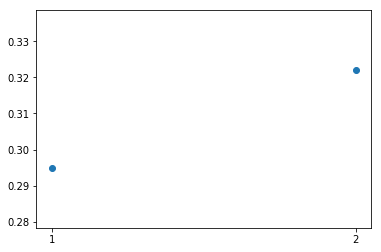

Vous voulez continuer : oui
f1-score :  0.3582766439909297 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     24374
           1       0.32      0.40      0.36      1384

    accuracy                           0.92     25758
   macro avg       0.65      0.68      0.66     25758
weighted avg       0.93      0.92      0.93     25758
 

Matrice de confusion : 
 Prédite  False  True 
Réelle               
0        23224   1150
1          831    553


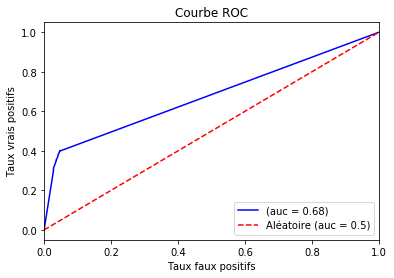

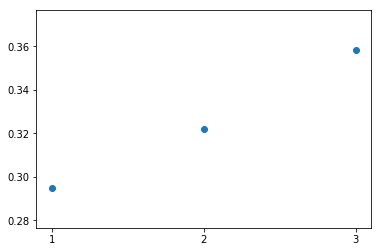

Vous voulez continuer : oui
f1-score :  0.39713774597495527 

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     24144
           1       0.37      0.43      0.40      1301

    accuracy                           0.93     25445
   macro avg       0.67      0.69      0.68     25445
weighted avg       0.94      0.93      0.94     25445
 

Matrice de confusion : 
 Prédite  False  True 
Réelle               
0        23205    939
1          746    555


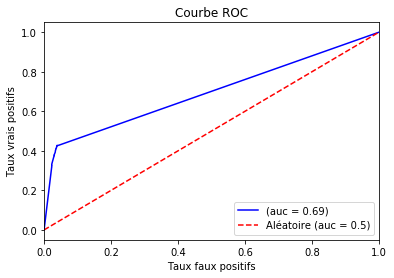

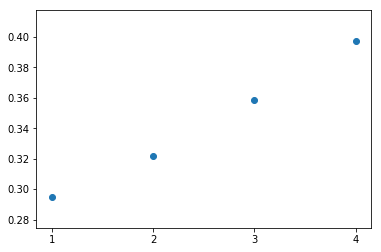

Vous voulez continuer : non


In [19]:
i = 0
x = []
score = []
continuer = "OUI"
while continuer == "OUI" : 
    
    # classification
    clf = DecisionTreeClassifier()
    
    # Entrainement
    clf.fit(X_train, y_train)
    
    # Prédiction
    #y_pred = clf.predict(X_test)
    y_pred = (clf.predict_proba(X_test)[:,1] >= 0.1).astype(bool)
    
    # Probabilité 
    probs = clf.predict_proba(X_test)
    
    # F1-score
    f1 = f1_score(y_test, y_pred)
    print("f1-score : ", f1, "\n")
    
    i += 1
    x.append(str(i))
    score.append(f1)
    
    # classification_report
    print(classification_report(y_test, y_pred),"\n")
    
    # Matrice de confusion
    print("Matrice de confusion : \n", pd.crosstab(y_test, y_pred, rownames=['Réelle'], colnames=['Prédite']))
    
    # Courbe ROC
    fpr, tpr, seuils = roc_curve(y_test, probs[:,1] ,pos_label = 1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color = "blue", label = '(auc = ' + str(round(roc_auc,2)) + ')')
    plt.plot([0,1],[0,1], color = 'red', linestyle = '--', label = 'Aléatoire (auc = 0.5)')
    plt.legend(loc = 'lower right')
    plt.title('Courbe ROC')
    plt.xlabel('Taux faux positifs')
    plt.ylabel('Taux vrais positifs')
    plt.xlim([0, 1])
    plt.show(); 
    
    # Evolution
    plt.scatter(x, score)
    plt.show()
     
    continuer = input('Vous voulez continuer : ').upper()
    if continuer == "OUI" :
        y = pd.DataFrame({"réel" : y_test , "pred" : y_pred})
        faux_negatifs = y[(y["pred"] == 0) & (y["réel"] == 1)]
        faux_negatifs_sample = faux_negatifs.sample(frac=0.1, random_state=1234)
        faux_positifs = y[(y["pred"] == 1) & (y["réel"] == 0)]
        faux_positifs_sample = faux_positifs.sample(frac=0.2, random_state=1234)
        faux = pd.concat([faux_negatifs_sample, faux_positifs_sample])
        X_test = X_test[~X_test.index.isin(faux.index)]
        y_test = y_test[~y_test.index.isin(faux.index)]
        X_train = pd.concat([X_train, X_test[X_test.index.isin(faux.index)]])
        y_train = pd.concat([y_train, y_test[y_test.index.isin(faux.index)]])